In [98]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
import pandas as pd
import numpy as np


In [99]:
#load the dataset
iris_dt=pd.read_csv('iris.csv')

In [100]:
iris_dt.keys()

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

In [107]:
iris_dt['Targets']=iris_dt.Class.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
X = iris_dt[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
Y = iris_dt[['Targets']]

model=KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xs=scaler.transform(X)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
Y_gmm=gmm.predict(xs)


In [109]:
#real plot
plt.figure(figsize=(10,10))
colormap=np.array(['red', 'lime' ,'black'])
plt.subplot(2,2,1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[Y.Targets],s=40)
plt.title('Real classification')
plt.xlabel('Petal length')
plt.ylabel('petal width')

Text(0,0.5,'petal width')

In [110]:

#knn ploting
plt.subplot(2,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[model.labels_],s=40)
plt.title('KNN classification')
plt.xlabel('Petal length')
plt.ylabel('petal width')


Text(0,0.5,'petal width')

In [111]:
#plot gmm
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[Y_gmm],s=40)
plt.title('GMM classisifcation')
plt.xlabel('Petal length')
plt.ylabel('Petal width')


Text(0,0.5,'Petal width')

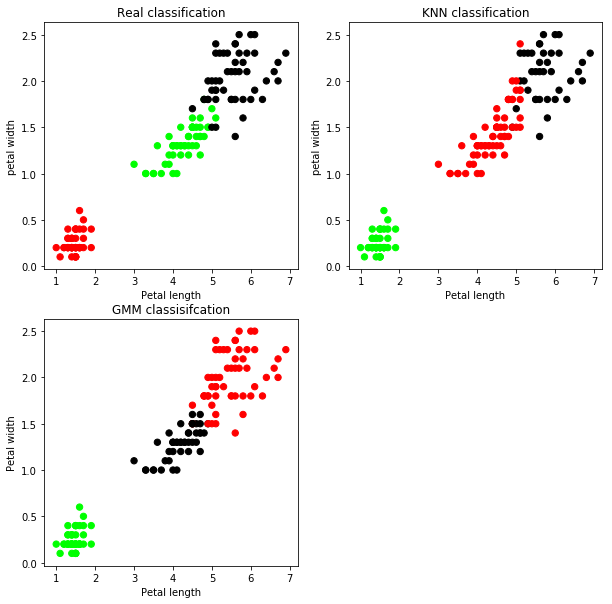

In [112]:
plt.show()

In [113]:
#calculate performace metrics
print('evaluation of K means algorithm  with ground truth classisification of iris dataset')
print('Rand Index:%f'% sm.adjusted_rand_score(Y.Targets,model.labels_))
print('Homogoenity score:%f'% sm.homogeneity_score(Y.Targets,model.labels_))
print('completeness score:%f'% sm.completeness_score(Y.Targets,model.labels_))
print('V measure:%f'% sm.v_measure_score(Y.Targets,model.labels_))
print('\n\n Evaluation of GMM with Ground truth Classiification of iris dataset')
print('Rand Index:%f'% sm.adjusted_rand_score(Y.Targets,Y_gmm))
print('Homogoenity score:%f'% sm.homogeneity_score(Y.Targets,Y_gmm))
print('completeness score:%f'% sm.completeness_score(Y.Targets,Y_gmm))
print('V measure:%f'% sm.v_measure_score(Y.Targets,Y_gmm))


evaluation of K means algorithm  with ground truth classisification of iris dataset
Rand Index:0.730238
Homogoenity score:0.751485
completeness score:0.764986
V measure:0.758176


 Evaluation of GMM with Ground truth Classiification of iris dataset
Rand Index:0.903874
Homogoenity score:0.898326
completeness score:0.901065
V measure:0.899694
